<a href="https://colab.research.google.com/github/nishres/streamflow_ml/blob/main/Preprocessing/09_0_multi_collinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    # print(vif_data)
    return vif_data

0 Babai_Chepang_normalized.csv
1 Kaligandaki_Anshing_normalized.csv
2 Marikhola_Nayagaon_normalized.csv
3 Seti_Gopaghat_normalized.csv
4 Sunkoshi_Pachwarghat_normalized.csv
5 Tamakoshi_Busti_normalized.csv
6 Tamor_Majhitar_normalized.csv
7 Thulibheri_Rimna_normalized.csv
8 Trishuli_Betrawati_normalized.csv
9 BudhiGandaki_Arughat_normalized.csv
Enter index of basin:0
The selected basin is Babai_Chepang_normalized.csv
       feature           VIF
0     u10_mean  4.407608e+01
1     v10_mean  4.797479e+01
2     t2m_mean  2.083283e+03
3     d2m_mean  7.197863e+01
4     skt_mean  3.219630e+03
5    stl1_mean  1.740457e+03
6   swvl1_mean  1.154236e+02
7   swvl2_mean  1.619272e+02
8   swvl3_mean  6.298077e+01
9   swvl4_mean  3.234732e+01
10    src_mean  1.315331e+01
11    sde_mean  5.742821e+02
12  snowc_mean  5.568993e+02
13      tp_sum  2.428969e+01
14      ro_sum  1.277031e+08
15     sro_sum  1.014191e+08
16    ssro_sum  5.493452e+06
17       e_sum  4.465912e+09
18      sf_sum  2.465467e+00


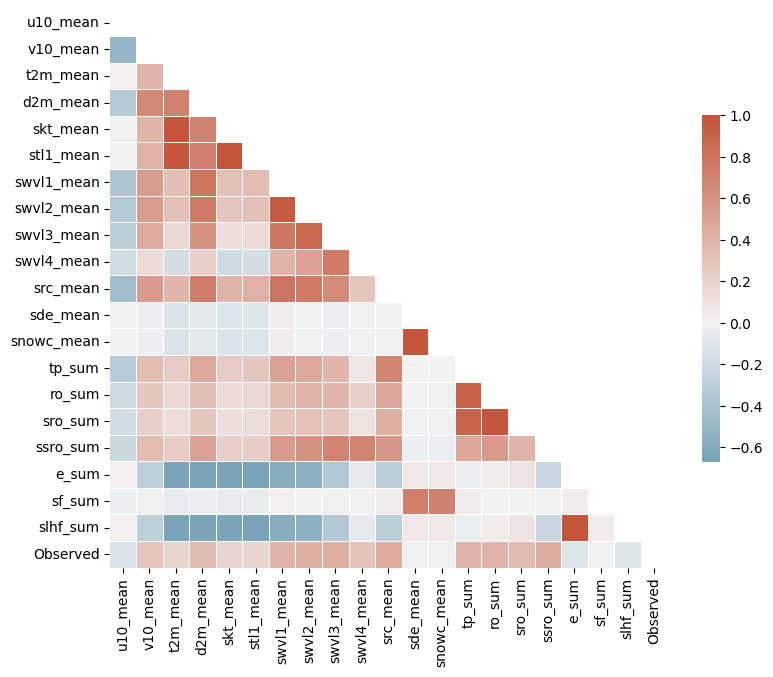

In [ ]:
in_path = '/content/drive/MyDrive/1/01_Normalized'
out_path = '/content/drive/MyDrive/1/02_Mult_Corr'
if not os.path.exists(out_path):
  os.makedirs(out_path)

all_files = os.listdir(in_path)
for i in range(len(all_files)):
  print(i,all_files[i])

current = int(input('Enter index of basin:'))
print(f'The selected basin is {all_files[current]}')

#file_name = all_files[current][:-15]
# print(file_name)
in_file = os.path.join(in_path,all_files[current])
#print(in_file)

df = pd.read_csv(in_file, index_col = 0)
df = df.drop(['t2m_max','t2m_min','skt_max','skt_min'],axis = 1)
df1 = df.dropna()

vif_data = calculate_vif(df1)
print(vif_data)

corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask = mask, cmap=cmap, vmax= 1.0 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


      feature        VIF
0    u10_mean  25.017831
1    v10_mean  22.174591
2    t2m_mean  15.963081
3    src_mean   5.111235
4  snowc_mean   2.088213
5      tp_sum   2.653640
6    ssro_sum   2.345657
7       e_sum  14.743305
8      sf_sum   2.055530
9    Observed   1.587435


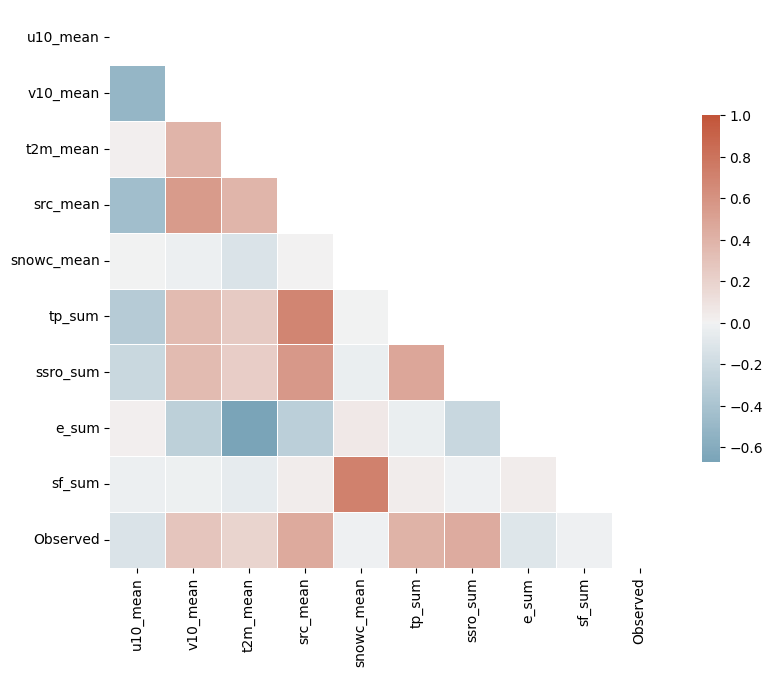

In [ ]:
df2 = df.drop(['swvl1_mean','swvl2_mean','swvl3_mean','swvl4_mean','skt_mean','stl1_mean','sde_mean','ro_sum','slhf_sum','d2m_mean','sro_sum'], axis=1)
df1 = df2.dropna()
vif_data = calculate_vif(df1)

print(vif_data)

corr = df1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,mask = mask, cmap=cmap, vmax= 1.0 , center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
df3 = df2.drop(['slhf_sum','swvl1_mean','snowc_mean'], axis=1)

In [ ]:
#df2 = df2.round(4)
file_name = all_files[current][:-15] + '_mult_corr.csv'
print(file_name)
out_file = os.path.join(out_path,file_name)
print(out_file)
df2.to_csv(out_file)

Babai_Chepang_mult_corr.csv
/content/drive/MyDrive/1/02_Mult_Corr/Babai_Chepang_mult_corr.csv


<Axes: >

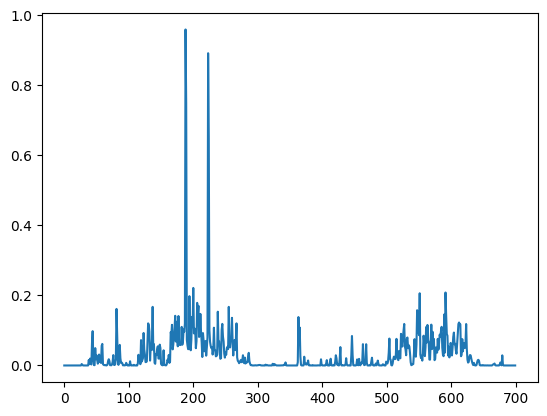

In [ ]:
df['tp_sum'][0:700].plot()